# Natural Language Processing for Amazon Toys Categorization

#### Author: 
*Michael Weiherer* </p>

*Johannes Georg Larcher* </p>

***Studies:*** Machine Learning ILV </p>

***Lecturer:*** Lukas Huber, MSc </p>

***University:*** Fachhochschule Kufstein Tirol </p>

# Agenda:

1. __Project Preparation__ <a href='#1.Section'>Link to Section</a>
2. __Project Setup__ <a href='#2.Section'>Link to Section</a>
3. __Project Analysis__ <a href='#3.Section'>Link to Section</a>
4. __Preprocessing__ <a href='#4.Section'>Link to Section</a>
5. __Simple Neural Network__ <a href='#5.Section'>Link to Section</a>
6. __Recurrent Neural Network - Game/Puzzle__ <a href='#6.Section'>Link to Section</a>
7. __Recurrent Neural Network - Game/Puzzle - Prediction__ <a href='#7.Section'>Link to Section</a>
8. __Recurrent Neural Network - All Categories__ <a href='#8.Section'>Link to Section</a>
9. __Recurrent Neural Network - All Categories - Prediction__ <a href='#9.Section'>Link to Section</a>

# Comment Workshop 2 - Inspiration for Workshop 3:
#### Abgabe 2:  	

sehr interessante Umsetzung von NLP - spannend was ihr in eurem WS3 abgeben werdet. \
Hoffe es gibt noch mehr Gelegenheit die Klassifiaktion von Amazon genauer anzusehen und Amazon erlaubt solche Vorgänge.

#### Angabe 3:
Zeigt die Anwendbarkeit und bringt euer “Projekt” zum Abschluss. Beantwortet ein “Big-Picture” - was war/ist das Problem und die Ausgangssituation? Was konntet ihr verbessern? Was sind weitere Möglichkeiten für zukünftige Entwicklungen? Was lief gut, was weniger?

- Anwendung von einem der Vorhergehenden Themen (DL, CNN, GAN, NLP, Time-Series, OCR,…) - Bindet das Thema ein.
- Wovon kann euer Projekt profitieren?
- Sind Limitationen zu erwarten (Hardware, Datenqualität, …) bzw. aufgetreten?

# 1.) Project Preparation
<a id='1.Section'></a>

## 1.1.) Project Goal - Stage I 

Our goal is to identify if a toys product belongs to the category games & puzzles by its item-name. This is crucial for Amazon currently as this is one of the most important categories during COVID-19 as customers started to puzzle/play more during the lockdown. Therefore we are going to use the Natural Language Processing feature and different neural nets for optimization and testing. 

## 1.2.) Project Goal - Stage II
After completing Stage I  and presenting it in class, we decided to focus more on our LSTM Neural Network. Therefore we decided to try to extend our LSTM to be able to identify each category by its *Item_Name*.



# 2.) Project Setup
<a id='2.Section'></a>

## 2.1.) Initial Situation / Status Quo
Currently the categorization of products on Amazon is defined by the input of the manufacturers through their external portal (VendorCentral). Therefore manufacturers choose the category/subcategory in which their products belong. \
Round about 20% - 30% of the selection is currently classified wrong which has following negative effects: \
- Bad customer experience on the website due to wrong search results when filtering for categories
- Wrong analysis when looking into category data (internal reviews as well as external reports for manufacturers)
- Impacted ordering as Amazon systems has different inbound strategies per category (very important right now during Covid-19 prioritization)

## 2.2.) Required Packages

First of all, we have loaded the appropiate packages for our project.

In [51]:
import numpy as np
from numpy import array
from numpy import asarray
from numpy import zeros
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers.recurrent import LSTM
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('german'))

## 2.3. Data Loading

The next step was to load the raw data we received from Amazon.

In [2]:
data = pd.read_csv("data/rawdata2.csv", encoding='latin-1')

# 3.) Project Analysis
<a id='3.Section'></a>

After completing the previous steps, we took a first look at our data.

In [3]:
data.head()

,Identifier,Item_Name,Category
0,B019YGSAPW,Ravensburger Spiele 23409 - Schwarzer Peter Mi...,0300 Games & Puzzles
1,B000QGRCN6,Henrys A01002-S01 - Yo-Yo Ersatzschnüre 6 Stüc...,0900 Outdoor & Sports Toys
2,B00KB45ULE,"London Teddy Bears 4X-CLQL-QFJN Sorry, es TUT ...",0700 Plush
3,B07NDXZ8ZH,KiddyMoon 90X30cm/300 Bälle ? 7Cm Bällebad Bab...,0900 Outdoor & Sports Toys
4,B079QGYCS7,Eichhorn 100003408 - Musik Set enthält Trommel...,1300 All Other


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39500 entries, 0 to 39499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Identifier  39500 non-null  object
 1   Item_Name   39500 non-null  object
 2   Category    39500 non-null  object
dtypes: object(3)
memory usage: 925.9+ KB


In [5]:
data.isna().any()

Identifier    False
Item_Name     False
Category      False
dtype: bool

In [16]:
data.Item_Name.value_counts()

Folienballon im Zahlen-Design, gro&szlig;, 86,4&nbsp;cm                                                   21
Elfique Tipi INDIANERZELT DOPPELT Gepolsterter Decke und Drei Kissen                                      12
Elfique New Tipi INDIANERZELT SPIELZELT DOPPELT Gepolsterter Decke (Zelt mit Decke)                       10
Papier Partytüten                                                                                         10
Widmann - Kinderkostüm Polizistin                                                                          7
                                                                                                          ..
Goki 51713 - Kaufläden und Zubehör - Lebensmittel und Haushaltswaren im Korb                               1
Majorette 212053165 Mercedes-AMG G63 Geschenkset, Miniaturfahrzeuge, 5 Spielzeugautos, Die-Cast, 7,5cm     1
Barbie FRP01 Supermarché Supermarkt und Puppe, Mehrfarbig                                                  1
Little Friends - Ka

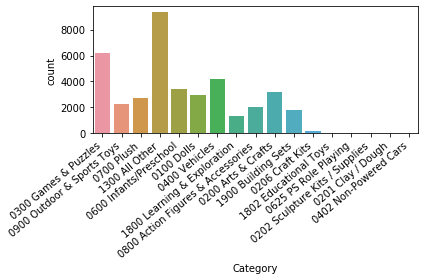

In [14]:
ax = sns.countplot(x='Category', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## 3.1.) Frequency Word Tables
To ensure good performance using our Neural Network we decided to check how often specific words occur. This is done for later usage when we are going to refuse unnecessary words - so called stopwords

In [24]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  fdist = nltk.FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
 
  # selecting top most frequent words
  d = words_df.nlargest(columns="count", n = terms)
 
  # visualize words and frequencies
  plt.figure(figsize=(12,15))
  ax = sns.barplot(data=d, x= "count", y = "word")
  ax.set(ylabel = 'Word')
  plt.show()

C:\Users\JohnnyRage\miniconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JohnnyRage\miniconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 150 missing from current font.
  font.load_char(ord(s), flags=flags)


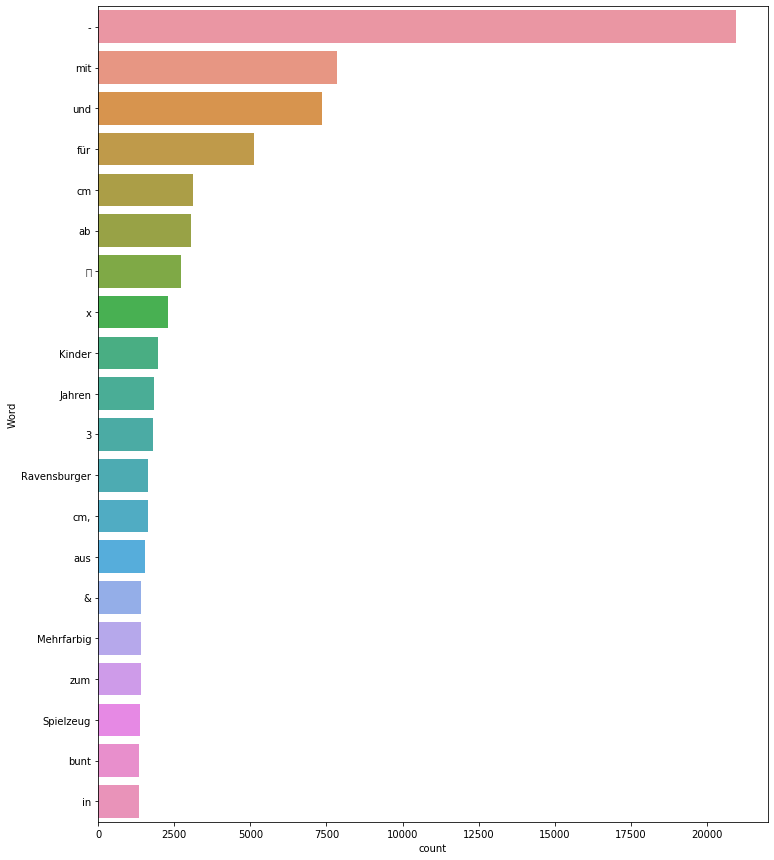

In [25]:
freq_words(data['Item_Name'], 20)

## 4.) Preprocessing
<a id='4.Section'></a>

The next big step within our project is preprocessing our data to ensure good performance later on. 

## 4.1.) Text Preprocessing

After checking for the most used words, our next step was to clean our data (get rid of any unwanted HTML - Tags, punctuations etc.) 

In [28]:
data = data.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('german'))

def clean_text(text):
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text
data['Item_Name'] = data['Item_Name'].apply(clean_text)

In [35]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    
    #Removing BackSlash
    sentence = re.sub("\'", "", sentence)
    
    #Removing Minus
    sentence = re.sub("-", "", sentence)
    
    #Remove CaseSensitive
    sentence = sentence.lower()

    return sentence

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [30]:
data.head()

,Identifier,Item_Name,Category
0,B019YGSAPW,ravensburger spiele 23409 schwarzer peter mitb...,0300 Games & Puzzles
1,B000QGRCN6,henrys a01002s01 yoyo ersatzschnre 6 stck wei,0900 Outdoor & Sports Toys
2,B00KB45ULE,london teddy bears 4clqlqfjn sorry tut leid braun,0700 Plush
3,B07NDXZ8ZH,kiddymoon 9030cm 300 blle 7cm bllebad baby spi...,0900 Outdoor & Sports Toys
4,B079QGYCS7,eichhorn 100003408 musik set enthlt trommel tr...,1300 All Other


## 4.2.) Test - Train - Split

*Reminder:* Despite we were having troubles with our train - test splits we implemented two different train - test - splits to ensure all neural networks to work properly

### Test - Train Split for Simple Neural Network and Categorical LSTM

In [36]:
X = []
sentences = list(data['Item_Name'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [37]:
y = data['Category']

y = np.array(list(map(lambda x: 1 if x=="0300 Games & Puzzles" else 0, y)))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## 4.3.) Tokenizer

We will use the Tokenizer class from the keras.preprocessing.text module to create a word-to-index dictionary. In the word-to-index dictionary, each word in the corpus is used as a key, while a corresponding unique index is used as the value for the key.

In [39]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

### 4.3.1.) Padding

We used the so called padding method to ensure that X_train and X_test have the same length otherwise we would not be able to work with our data. 

In [40]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [41]:
X_train

array([[ 288,    0,    0, ...,    0,    0,    0],
       [ 139, 1043,  293, ...,    0,    0,    0],
       [ 900,  372, 1711, ...,    0,    0,    0],
       ...,
       [ 168,   22,  880, ...,    0,    0,    0],
       [ 118,  238,  278, ...,    0,    0,    0],
       [  29,   32,   10, ...,    0,    0,    0]])

## 4.4.) Embedded Dictionary

We will use Glove embeddings to create our feature matrix. In the script we load the Glove word embeddings and create a dictionary. This will contain words as keys and their corresponding embedding list as values.

In [43]:
embeddings_dictionary = dict()
glove_file = open('data/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [44]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# 5.) Simple Neural Network
<a id='5.Section'></a>

To begin with, we setup a Simple Neural Network to check first performance.

In [45]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [46]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          3259900   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10001     
Total params: 3,269,901
Trainable params: 10,001
Non-trainable params: 3,259,900
_________________________________________________________________
None


In [47]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 25280 samples, validate on 6320 samples
Epoch 1/10
25280/25280 [==============================] - 1s 27us/step - loss: 0.6618 - acc: 0.8443 - val_loss: 0.6326 - val_acc: 0.8411
Epoch 2/10
25280/25280 [==============================] - 1s 22us/step - loss: 0.6070 - acc: 0.8443 - val_loss: 0.5845 - val_acc: 0.8411
Epoch 3/10
25280/25280 [==============================] - 1s 22us/step - loss: 0.5636 - acc: 0.8443 - val_loss: 0.5469 - val_acc: 0.8411
Epoch 4/10
25280/25280 [==============================] - 1s 22us/step - loss: 0.5299 - acc: 0.8443 - val_loss: 0.5178 - val_acc: 0.8411
Epoch 5/10
25280/25280 [==============================] - 1s 22us/step - loss: 0.5039 - acc: 0.8443 - val_loss: 0.4956 - val_acc: 0.8411
Epoch 6/10
25280/25280 [==============================] - 1s 22us/step - loss: 0.4842 - acc: 0.8443 - val_loss: 0.4789 - val_acc: 0.8411
Epoch 7/10
25280/25280 [==============================] - 1s 22us/step - loss: 0.4693 - acc: 0.8443 - val_loss: 0.4665 - val_acc:

## 5.1) Check Results

In [48]:
score = model.evaluate(X_test, y_test, verbose=1)

7900/7900 [==============================] - 0s 29us/step


In [49]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.4477382220648512
Test Accuracy: 0.8399999737739563


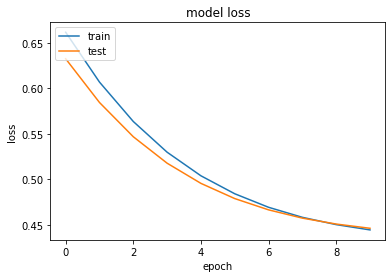

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

The performance of our simple neural network is not bad. It's fitting quite good - No Over & or Underfitting.  We reached a Test Score of 0.447738 and a Test Accuracy of 0.839999. Not bad but still not as good as our model should be. Also our model is only able to determine if the Item is a Game/Puzzle or not. 

# 6.) Recurrent Neural Network (LSTM) - Game/Puzzle
<a id='6.Section'></a>

After completing our first simple neural network, we came up with the idea to use a Long-Term-Short-Memory Neural Network, because it is a commonly used for pattern recognition. 

In [52]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [53]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          3259900   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 3,377,277
Trainable params: 117,377
Non-trainable params: 3,259,900
_________________________________________________________________
None


In [54]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Train on 25280 samples, validate on 6320 samples
Epoch 1/6
25280/25280 [==============================] - 74s 3ms/step - loss: 0.4445 - acc: 0.8443 - val_loss: 0.4382 - val_acc: 0.8411
Epoch 2/6
25280/25280 [==============================] - 90s 4ms/step - loss: 0.4339 - acc: 0.8443 - val_loss: 0.4423 - val_acc: 0.8411
Epoch 3/6
25280/25280 [==============================] - 88s 3ms/step - loss: 0.4334 - acc: 0.8443 - val_loss: 0.4378 - val_acc: 0.8411
Epoch 4/6
25280/25280 [==============================] - 88s 3ms/step - loss: 0.4331 - acc: 0.8443 - val_loss: 0.4389 - val_acc: 0.8411
Epoch 5/6
25280/25280 [==============================] - 88s 3ms/step - loss: 0.4330 - acc: 0.8443 - val_loss: 0.4380 - val_acc: 0.8411
Epoch 6/6
25280/25280 [==============================] - 88s 3ms/step - loss: 0.4330 - acc: 0.8443 - val_loss: 0.4379 - val_acc: 0.8411


## 6.1.) Check Results

In [55]:
score = model.evaluate(X_test, y_test, verbose=1)

7900/7900 [==============================] - 7s 852us/step


In [56]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.4397382724285126
Test Accuracy: 0.8399999737739563


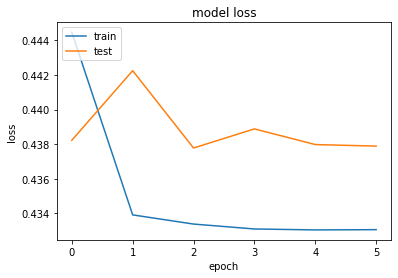

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

After double checking our test-train-split we are still not sure why the Test Accuracy of the Simple Neural Network and of the Recurrent Neural Network are the same. But when looking at the plot we can clearly see that our model is underfitting. The reasons for this could either be to little amount of epochs or to less capacity. This could be improved by increasing the number of memory cells of the hidden layers or the amount of hidden layers itself. 

For checking if the Item is a Game/Puzzle we are sticking to our LSTM.

# 7.) Recurrent Neural Network - Categorical - Prediction
<a id='7.Section'></a>

In [58]:
instance = X[57]
print(instance)

jamara rc audi lms silber


In [59]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

array([[0.1643179]], dtype=float32)

## 7.1.) Check Results

As an result our model predicted 0,1649089. This means that our sigmoid functions predicts a floating value between 0 and 1. Therefore in our case the model predicted the above mentiond value. So when we have a look out our instace (Jamara RC Audi LMS silber) and search for it in our data we saw that it is categorized not as a Game/Puzzle. Our model also predicted it not to be a Game/Puzzle. 

So we can say that: 

under 0.5 = No Game/Puzzle </p>
above 0.5 = Game/Puzzle

# 8.) Recurrent Neural Network (LSTM) - All Categories
<a id='8.Section'></a>

For Workshop 3 we planned to improve our LSTM and as mentioned earlier as we were not able to determine our test-train split error, we tried a new approach for the new recurrent model

## 8.1.) Tokenizer

In [62]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['Item_Name'].values)
word_index = tokenizer.word_index

### 8.1.2.) Check for amount of tokens

In [63]:
print('Found %s unique tokens.' % len(word_index))

Found 69748 unique tokens.


## 8.2.) Test - Train - Split

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)

### 8.2.2.) Shaping

Each tensor object is defined with a unique label (name), a dimension (shape) and a data type (dtype).

In [67]:
X = tokenizer.texts_to_sequences(data['Item_Name'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

Y = pd.get_dummies(data['Category']).values

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
print('Label Tensor Shape:', Y.shape)
print('Data Tensor Shape:', X.shape)


(35550, 250) (35550, 17)
(3950, 250) (3950, 17)
Label Tensor Shape: (39500, 17)
Data Tensor Shape: (39500, 250)


## 8.3.) Model

In [68]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(17, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_3 (Dense)              (None, 17)                1717      
Total params: 5,082,117
Trainable params: 5,082,117
Non-trainable params: 0
_________________________________________________________________
None


In [69]:
epochs = 5
batch_size = 64
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

C:\Users\JohnnyRage\miniconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 31995 samples, validate on 3555 samples
Epoch 1/5
31995/31995 [==============================] - 540s 17ms/step - loss: 1.5352 - accuracy: 0.5150 - val_loss: 0.8387 - val_accuracy: 0.7595
Epoch 2/5
31995/31995 [==============================] - 542s 17ms/step - loss: 0.6194 - accuracy: 0.8169 - val_loss: 0.6985 - val_accuracy: 0.7873
Epoch 3/5
31995/31995 [==============================] - 547s 17ms/step - loss: 0.3570 - accuracy: 0.8946 - val_loss: 0.6890 - val_accuracy: 0.8048
Epoch 4/5
31995/31995 [==============================] - 542s 17ms/step - loss: 0.2205 - accuracy: 0.9349 - val_loss: 0.7423 - val_accuracy: 0.8031
Epoch 5/5
31995/31995 [==============================] - 539s 17ms/step - loss: 0.1514 - accuracy: 0.9555 - val_loss: 0.8121 - val_accuracy: 0.8051


## 8.4.) Check Results

In [70]:
accr = model.evaluate(X_test,Y_test)  
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

3950/3950 [==============================] - 11s 3ms/step
Test set
  Loss: 0.864
  Accuracy: 0.790


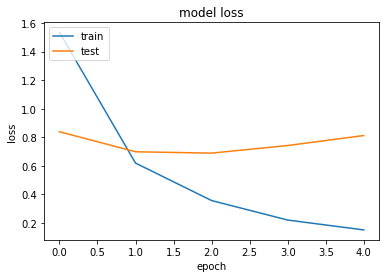

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

After about 40 minutes our extended LSTM finished working and the results were quite interesting. We received a Loss of 0.864 and an Accuracy of 0.790. Compared to the other models, the extended LSTM did perform not as good as the others. BUT! We only did 5 epochs - just as proof of concept. For personal interests I tried increasing the number of epochs to 100 and after about 17 hours the model finally finished and we increased our Accuracy to about 0.85 and the loss dropped down to 0.43 Still not the point we were aiming at but we have been coming closer.  

# 9.) Recurrent Neural Network - All Categories - Prediction
<a id='9.Section'></a>

In [77]:
new_item = ["Ravensburger Machine Learning Puzzle Lukas Huber Edition"]
seq = tokenizer.texts_to_sequences(new_item)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels =  ['0100 Dolls', '0200 Arts & Crafts', '0201 Clay / Dough', '0202 Sculpture Kits', '0206 Craft Kits', '0300 Games & Puzzle', '0400 Vehicles', '0402 Non powered Cars', '0600 Infants / Preschool', '0625 PS Role Playing', '0700 Plush', '0800 Action Figures & Accessiores', '0900 Outdoor & Sports', '1300 All Other', '1800 Learning & Exploration', '1802 Educational Toys', '1900 Building Sets']
print(pred, labels[np.argmax(pred)])

[[4.0181512e-06 2.1531482e-04 4.8191837e-06 1.2685143e-05 1.6272961e-06
  9.8889428e-01 3.8181061e-06 7.6126285e-06 1.2620135e-04 7.6002893e-06
  7.1135124e-05 1.7569546e-04 1.0058013e-04 8.9274254e-03 1.4115743e-03
  3.3218057e-06 3.2386255e-05]] 0300 Games & Puzzle


***Result:*** Within the new_item column you can fill in any fantasy product you wish. The model tries to predict the belonging category. We tried with differnt categories and different item names and in all cases our model predicted the right category. 

# 10.) Outlook / Project Conclusion

When rethinking our project we can definitely say that it was successful. We received the data from Amazon, checked and cleaned it in the first phase to prepare it for our models. Second phase was to get to know with NLP (Natural Language Processing). Third phase was to implement two small models to check the learned concepts and to receive some first results. The last phase was all about improving our existing  models and trying to get rid of errors. Additionally we were able to fulfill the project goal, which was to categorize every new item in the toy sector for Amazon. 

The next step (outside the current project) would be to improve the model (more epochs, hidden layers etc). We will reach out to colleagues of AWS to implement the current LSTM's to check if the performance would increase more if the number of epochs (<100) increase drastically. 

***Findings of the Project:*** </p>

**Pros:**
+ Data Gathering was good
+ Get to know with NLP was well documented (https://www.analyticsvidhya.com/blog/2019/04/predicting-movie-genres-nlp-multi-label-classification/)
+ Communication within the team (MS-Teams & Github) </p>

**Cons:**
- Time Management (Project took more time than expected) 
- Hardware Limitations (even with good Hardware) more than 5 epochs would have taken an enormous amount of time
- Stopwords Functionality was not 100% accurate (English works 100% fine but German stopwords are not completely filtered) 